In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [11]:
data_analysis_df = pd.read_csv('5860_11_30_2024.csv',delimiter=',')

In [12]:
try:
    data_analysis_df.drop(columns=['Unnamed: 0'],inplace=True)
except:
    print('already clean or error')

In [13]:
data_analysis_df.rename(columns={'varsigma_deg':'$\\varsigma_{deg}$'},inplace=True)

In [14]:
data_analysis_df[data_analysis_df['mult']==5].head(100)

,scenario,half_hat,K,rel_oracle_time,C_bar_size,num_min_loc,mult,$\varsigma_{deg}$,upsilon,n,m
240,0,35.437057,68.756972,10.532900,9943,477,5.0,0.0002,0.0,500.0,10000.0
241,1,18.730379,49.912351,5.377599,9921,476,5.0,0.0002,0.0,500.0,10000.0
242,2,34.137283,69.000000,10.714456,9944,476,5.0,0.0002,0.0,500.0,10000.0
243,3,22.552214,82.784861,15.133973,9943,476,5.0,0.0002,0.0,500.0,10000.0
244,4,6.746075,73.051793,11.818171,9926,477,5.0,0.0002,0.0,500.0,10000.0
245,5,10.172614,53.912351,6.339448,9916,476,5.0,0.0002,0.0,500.0,10000.0
246,6,7.037636,49.063745,5.250116,9942,476,5.0,0.0002,0.0,500.0,10000.0
247,7,33.695189,52.956175,6.187384,9926,476,5.0,0.0002,0.0,500.0,10000.0
248,8,40.286086,55.011952,6.713203,9931,476,5.0,0.0002,0.0,500.0,10000.0
249,9,49.564443,47.000000,4.754558,9944,476,5.0,0.0002,0.0,500.0,10000.0


In [15]:
data_analysis_df['log_rel_oracle_time'] = np.log10(data_analysis_df['rel_oracle_time'].values)
data_analysis_df['rel_C_bar_size'] = data_analysis_df['C_bar_size'].values / np.mean(data_analysis_df['m'])
data_analysis_df['rel_num_min_loc'] = data_analysis_df['num_min_loc'].values / np.mean(data_analysis_df['n'])

In [20]:
(1118)/int(10000**(3/2))

0.001118

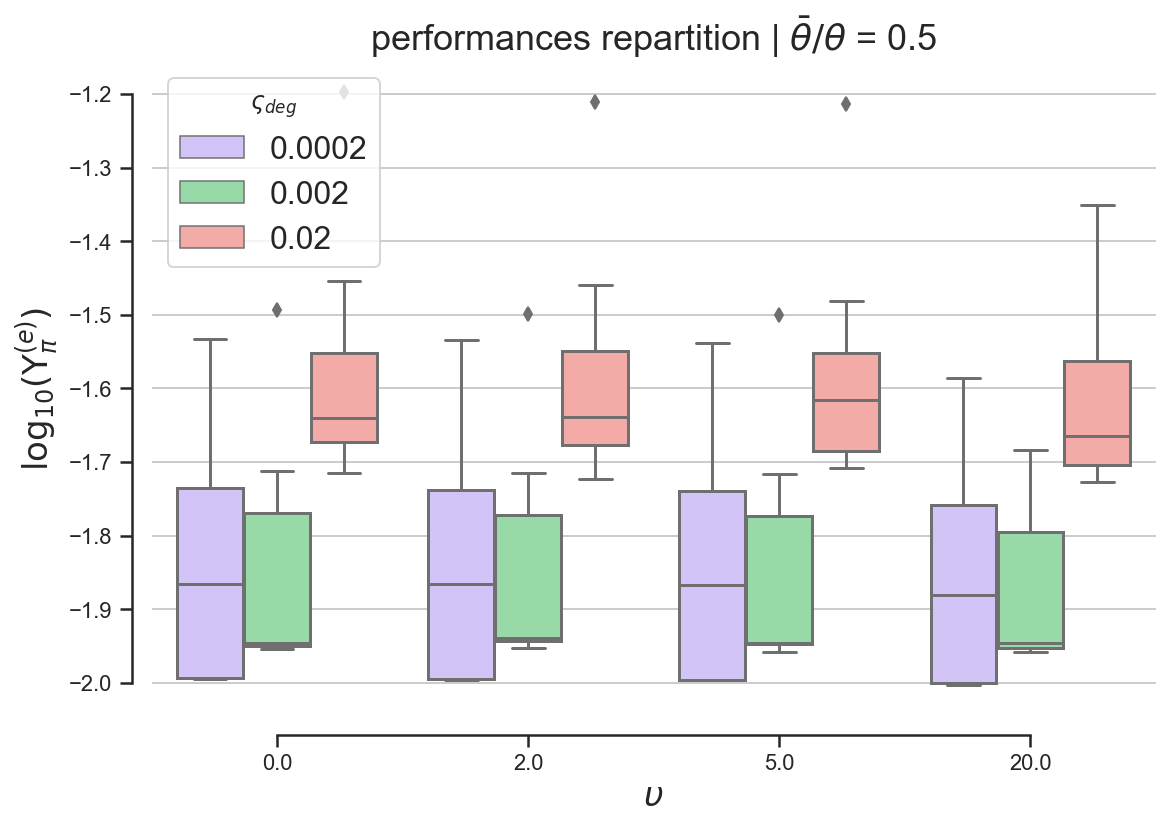

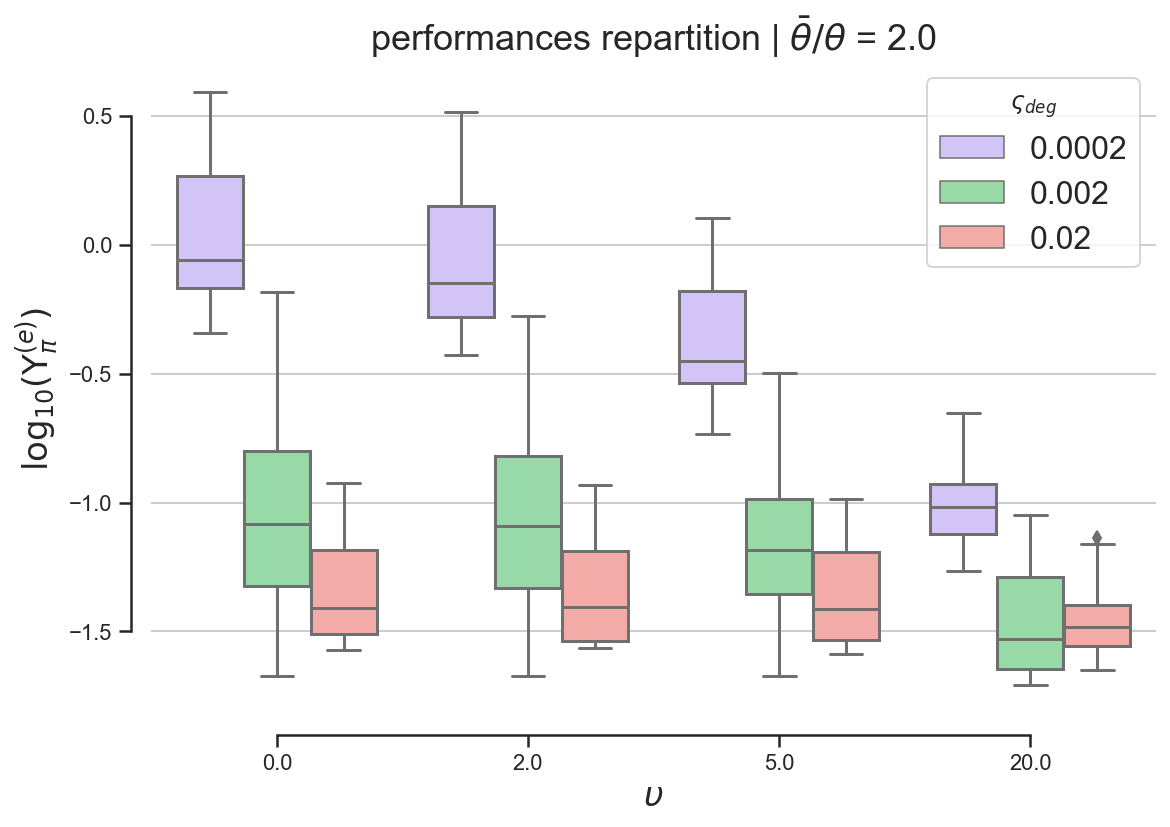

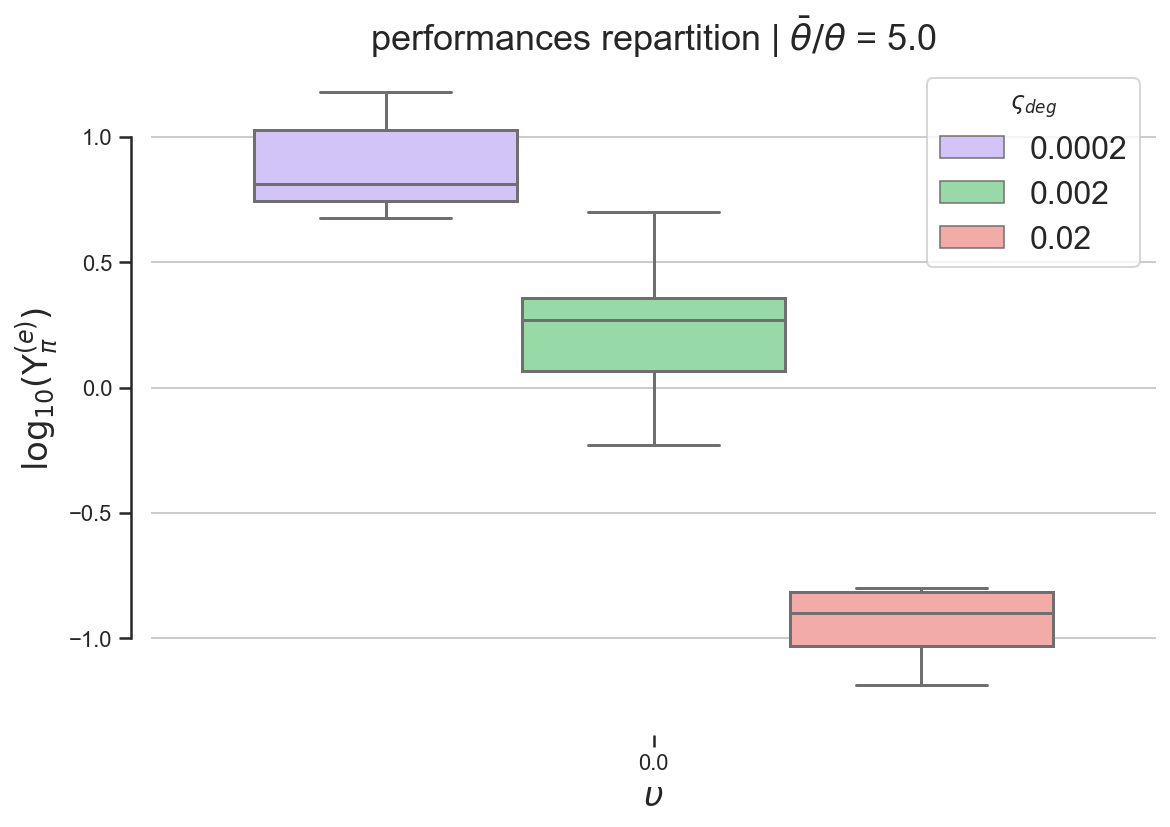

In [23]:
sns.set_theme(style="ticks", palette="pastel")
upsilon_span = [min(data_analysis_df['upsilon'].values),max(data_analysis_df['upsilon'].values)]
for mult in np.unique(data_analysis_df['mult'].values):
    plt.figure(figsize=(9,6))
    plt.grid()
    local_df = data_analysis_df[data_analysis_df['mult']==mult]
    local_time_values = local_df['log_rel_oracle_time'].values
    #if max(local_time_values)>0:
    #    plt.plot(upsilon_span,[0,0],label='enumeration scheme (neutral ref.)',color='k',linestyle='-.')
    #else:
    #    plt.plot([],[],label='enumeration scheme (0 - neutral ref)',color='k',linestyle='-.')
    plt.title('performances repartition | $\\bar{\\theta}/\\theta$ = '+str(mult),fontsize=18)
    gfg = sns.boxplot(x="upsilon", y="log_rel_oracle_time",
            hue="$\\varsigma_{deg}$", palette=["m", "g","r"],
            data=local_df)
    sns.despine(offset=10, trim=True)
    gfg.legend(title='$\\varsigma_{deg}$',fontsize=16)
    plt.xlabel('$\\upsilon$',fontsize=17)
    plt.ylabel('$\\log_{10}(\\Upsilon^{(e)}_{\\pi})$',fontsize=17)
    plt.savefig('raw_results_mult_'+str(mult)+'.pdf',dpi=500)

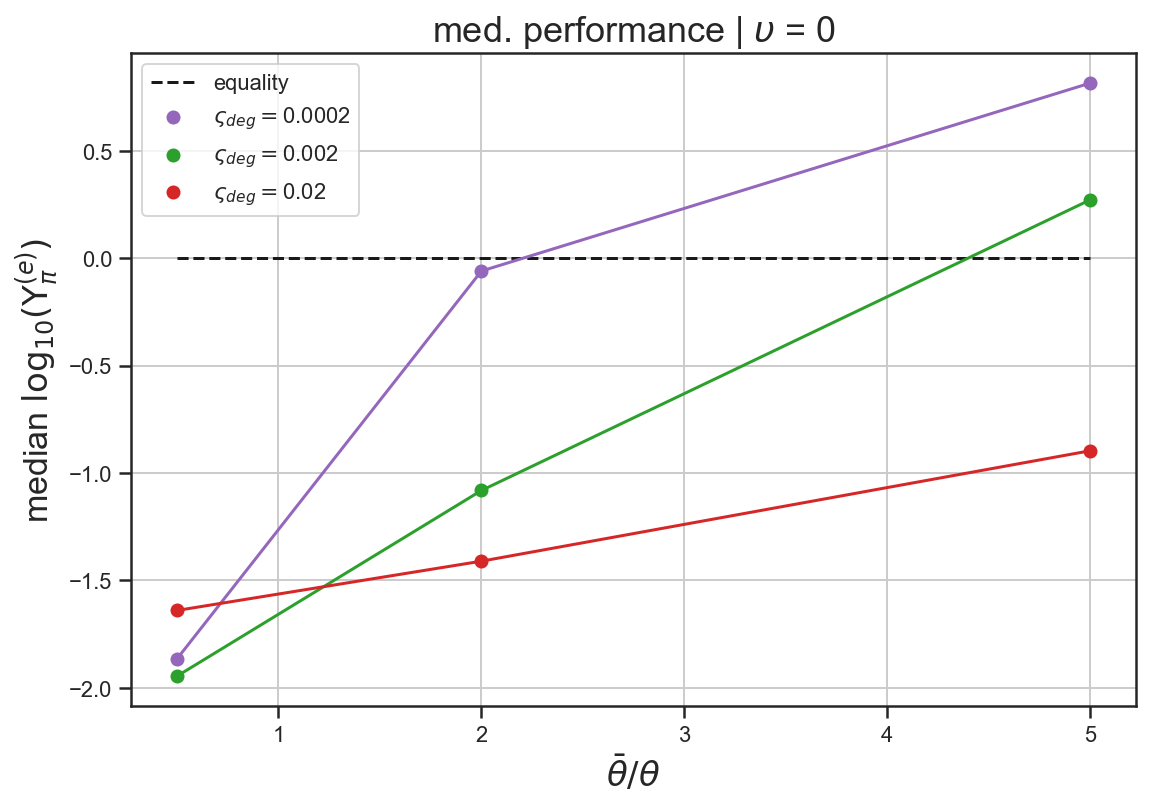

In [43]:
colors_ = ['tab:purple','tab:green','tab:red'] 

plt.figure(figsize=(9,6))
plt.title('med. performance | $\\upsilon$ = 0',fontsize=18)
lookup = np.sort(np.unique(data_analysis_df['mult'].values))
lookup2 = np.sort(np.unique(data_analysis_df['$\\varsigma_{deg}$'].values))
span = [lookup[0],lookup[-1]]
plt.grid()
plt.plot(span,[0,0],color='k',label='equality',linestyle='--')
local_df = data_analysis_df[data_analysis_df['upsilon']==0]
for id_co,varsigma_deg in enumerate(lookup2):
    multis = []
    avg_perf = []
    ldf = local_df[local_df['$\\varsigma_{deg}$']==varsigma_deg]
    for mult in lookup:
        multis.append(mult)
        avg_perf.append(np.median(ldf[ldf['mult']==mult]['log_rel_oracle_time']))
    plt.scatter(multis,avg_perf,label='$\\varsigma_{deg} = $'+str(varsigma_deg),color=colors_[id_co])
    plt.plot(multis,avg_perf,color=colors_[id_co])
plt.xlabel('$\\bar{\\theta}/\\theta$',fontsize=17)
plt.ylabel('median $\\log_{10}(\\Upsilon^{(e)}_{\\pi})$',fontsize=17)
plt.legend();
plt.savefig('compact_med.pdf',dpi=500)